In [27]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.image import imread
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
import json

sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

from datetime import timezone, datetime

In [2]:
df = pd.read_csv('../data/diagnose_merged.csv')
df1 = pd.read_csv('../data/PATIENTS.csv')
df2 = pd.read_csv('../data/ICUSTAYS.csv')

ll = list(df1['DOB'])
df1['Timestamp'] = list(map(lambda x: datetime(int(x[0:4]), int(x[5:7]), int(x[8:10])).replace(tzinfo=timezone.utc).timestamp(), ll))

In [3]:
merged = pd.merge(left=df2, right=df1, left_on='SUBJECT_ID', right_on='SUBJECT_ID')
merged.shape

(61532, 20)

In [4]:
types = merged.dtypes

#pd.Timestamp(list(merged["DOB"]))
#merged["DOB"] = pd.to_datetime(merged["DOB"])
#merged["DOB"].astype("float") 

ll = list(merged['DOB'])
merged['Timestamp'] = list(map(lambda x: datetime(int(x[0:4]), int(x[5:7]), int(x[8:10])).replace(tzinfo=timezone.utc).timestamp(), ll))
print(types)

ROW_ID_x            int64
SUBJECT_ID          int64
HADM_ID             int64
ICUSTAY_ID          int64
DBSOURCE           object
FIRST_CAREUNIT     object
LAST_CAREUNIT      object
FIRST_WARDID        int64
LAST_WARDID         int64
INTIME             object
OUTTIME            object
LOS               float64
ROW_ID_y            int64
GENDER             object
DOB                object
DOD                object
DOD_HOSP           object
DOD_SSN            object
EXPIRE_FLAG         int64
Timestamp         float64
dtype: object


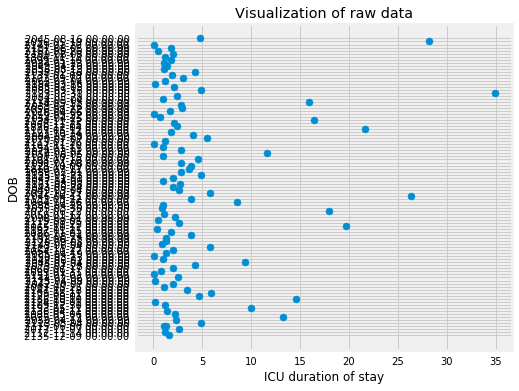

In [5]:
sampledf = merged.sample(n=100)

plt.figure(figsize=(6, 6))
plt.scatter(sampledf['LOS'], sampledf['DOB'])
plt.xlabel('ICU duration of stay')
plt.ylabel('DOB')
plt.title('Visualization of raw data');

In [28]:
X_std = StandardScaler().fit_transform(sampledf.iloc[:,[11,19]])

# Run local implementation of kmeans
km = KMeans(n_clusters=3, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

AttributeError: 'KMeans' object has no attribute 'centroids'